In [2]:
import seaborn as sns


In [4]:
import pandas as pd
from pandas import ExcelFile
from pandas import ExcelWriter
import numpy as np


In [52]:
import matplotlib.pyplot as plt
import cufflinks as cf
%matplotlib inline

In [4]:
pip install cufflinks


     -------------------------------------- 81.7/81.7 kB 382.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68718 sha256=b117a16422c02a7cebe9ec3800129f1bb01d90e276331642f54e0fd65f164ced
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks
Note: you may need to restart the kernel to use updated packages.


In [6]:
import re

In [7]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
from sklearn.preprocessing import LabelEncoder

In [8]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls


In [9]:
import pickle

In [46]:
import pandas as pd

In [12]:
import os
os.chdir("C:/Users/user/Desktop/project")

In [13]:
df=pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [14]:
dummy=pd.get_dummies(df['Heart Disease'])

In [15]:
dummy.head()

,Absence,Presence
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [16]:
df2=pd.concat((df,dummy),axis=1)

In [17]:
df2.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Absence,Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,0,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,1,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,0,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,1,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,1,0


In [18]:
df2=df2.drop(['Heart Disease'],axis=1)

In [19]:
df2.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Absence,Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,0,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,0,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1,0


In [22]:
#df=df2.rename(columns={"Presence":"Heart Disease"})
df['Heart Disease'].replace(['Absence', 'Presence'],
                        [0, 1], inplace=True)


In [23]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [24]:
df.shape

(270, 14)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [26]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [27]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [28]:
df['Heart Disease'].value_counts()

0    150
1    120
Name: Heart Disease, dtype: int64

In [29]:
df['Heart Disease'].value_counts()/df.shape[0]*100

0    55.555556
1    44.444444
Name: Heart Disease, dtype: float64

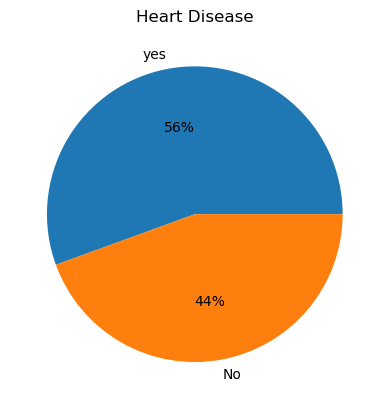

In [35]:
labels = ['yes', 'No']
values = df['Heart Disease'].value_counts().values
plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()

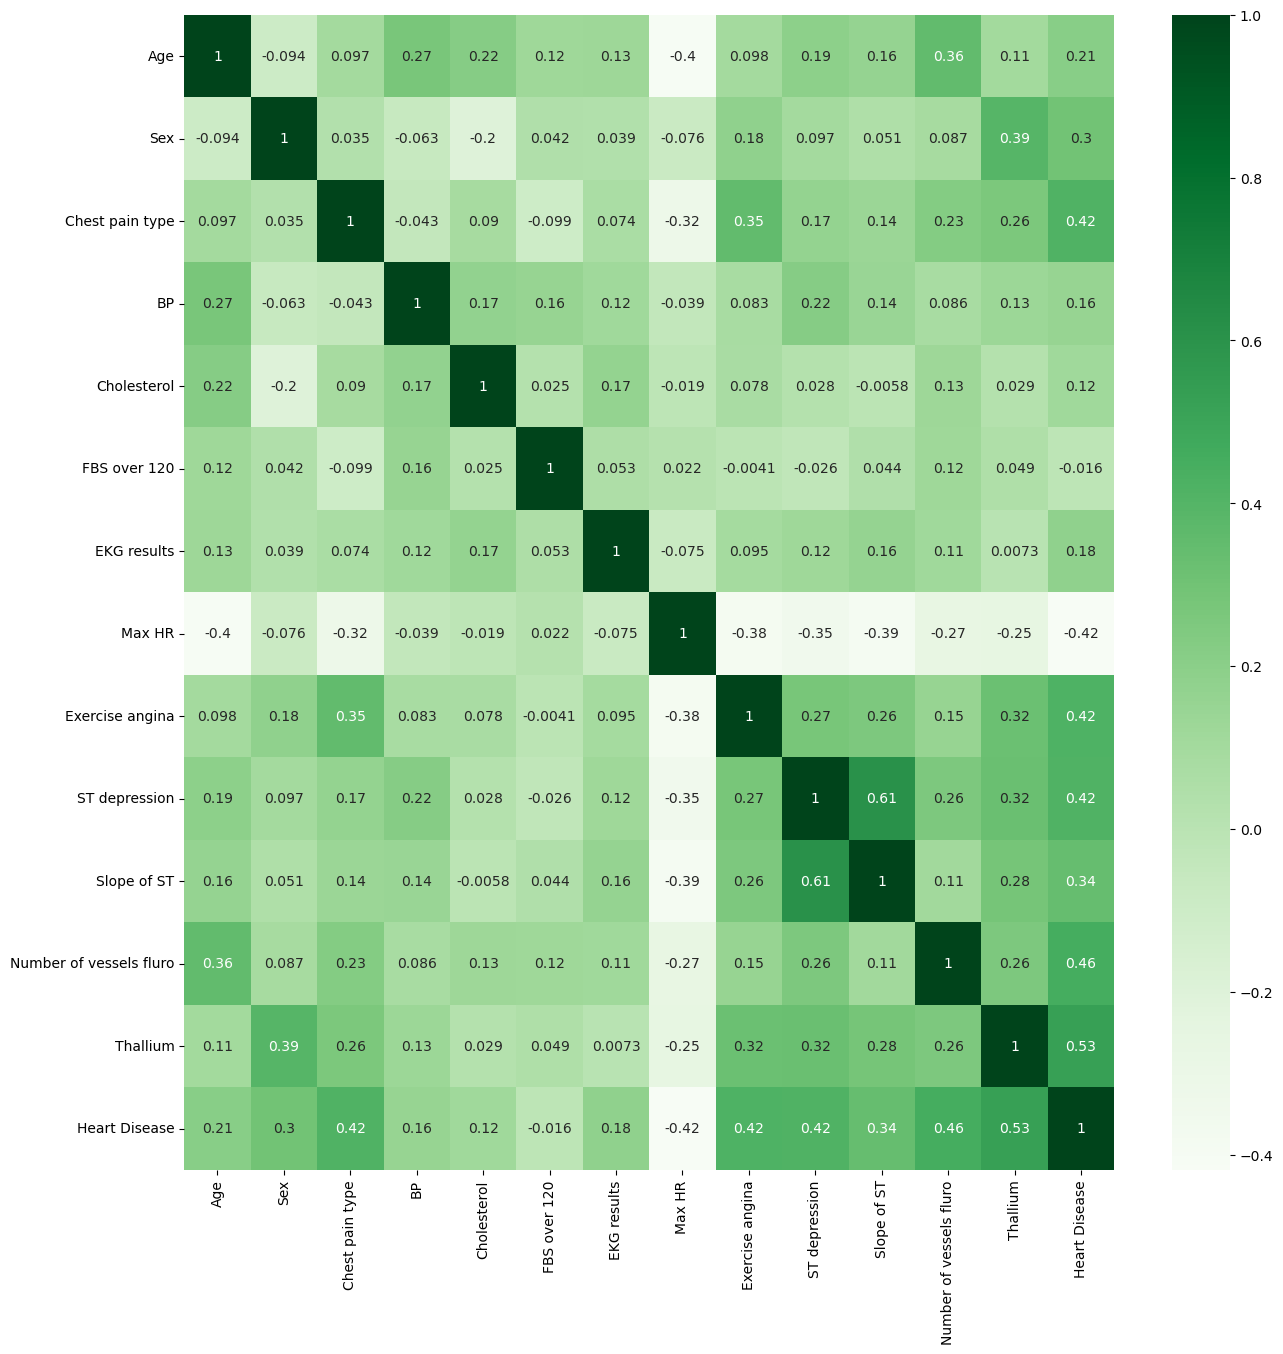

In [30]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, cmap = "Greens")
plt.show()

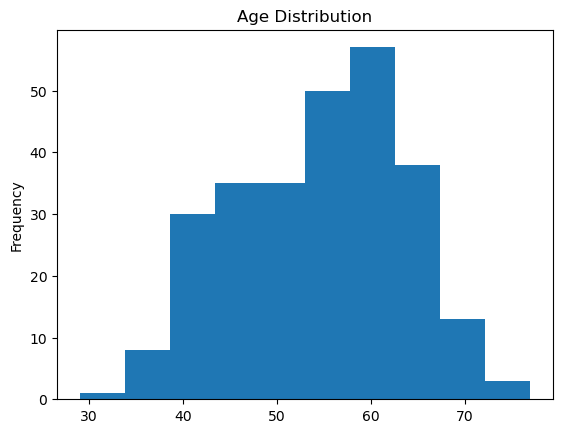

In [35]:
#Display age distribution
df['Age'].plot(kind = 'hist', title = 'Age Distribution')
plt.show()

In [31]:
#print the min,max and average
print('Min age: ', min(df['Age']))
print('Max age: ', max(df['Age']))
print('Average age: ', df['Age'].mean())

Min age:  29
Max age:  77
Average age:  54.43333333333333


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



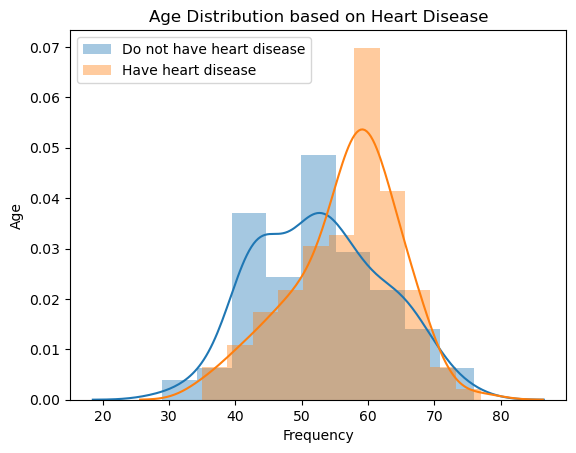

In [32]:
sns.distplot(df[df['Heart Disease'] == 0]['Age'], label='Do not have heart disease')
sns.distplot(df[df['Heart Disease'] == 1]['Age'], label = 'Have heart disease')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Age Distribution based on Heart Disease')
plt.legend()
plt.show()

In [33]:
print('Min age of people who do not have heart disease: ', min(df[df['Heart Disease'] == 1]['Age']))
print('Max age of people who do not have heart disease: ', max(df[df['Heart Disease'] == 1]['Age']))
print('Average age of people who do not have heart disease: ', df[df['Heart Disease'] == 1]['Age'].mean())

Min age of people who do not have heart disease:  35
Max age of people who do not have heart disease:  77
Average age of people who do not have heart disease:  56.59166666666667


In [37]:
print('Min age of people who have heart disease: ', min(df[df['Heart Disease'] == 0]['Age']))
print('Max age of people who have heart disease: ', max(df[df['Heart Disease'] == 0]['Age']))
print('Average age of people who have heart disease:', df[df['Heart Disease'] == 0]['Age'].mean())

Min age of people who have heart disease:  29
Max age of people who have heart disease:  76
Average age of people who have heart disease: 52.70666666666666


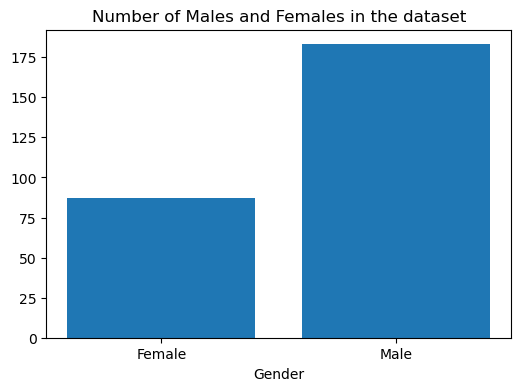

In [40]:
F = df[df['Sex'] == 0].count()['Heart Disease']
M = df[df['Sex'] == 1].count()['Heart Disease']

figure, ax = plt.subplots(figsize = (6, 4))
ax.bar(x = ['Female', 'Male'], height = [F, M])
plt.xlabel('Gender')
plt.title('Number of Males and Females in the dataset')
plt.show()

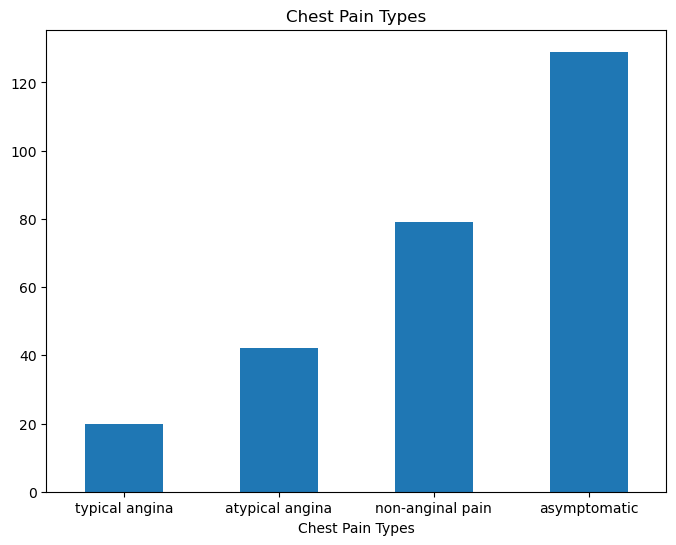

In [41]:
df.groupby(df['Chest pain type']).count()['Heart Disease'].plot(kind = 'bar', title = 'Chest Pain Types', figsize = (8, 6))
plt.xlabel('Chest Pain Types')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.show()

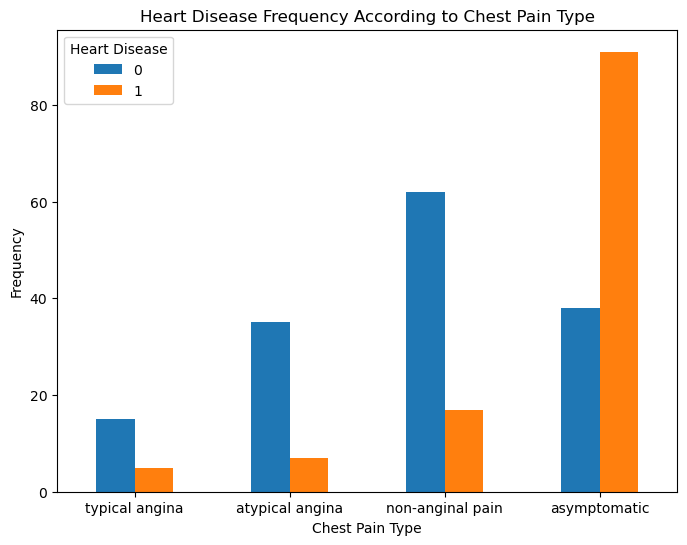

In [62]:
pd.crosstab(df['Chest pain type'] , df['Heart Disease']).plot(kind = "bar", figsize = (8, 6))            
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

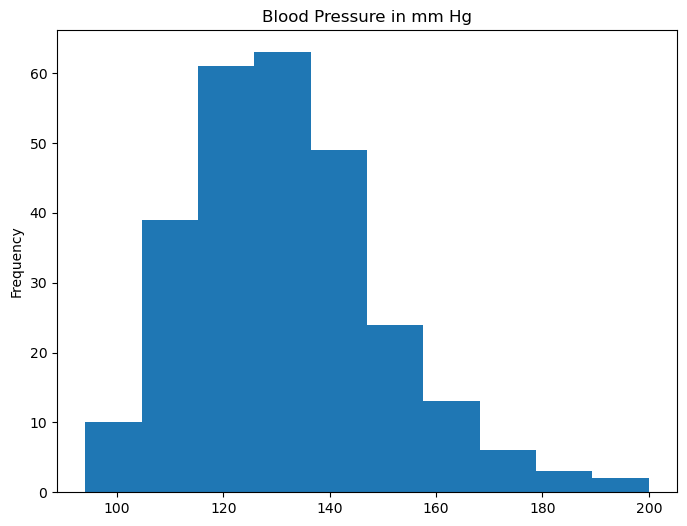

In [64]:
df['BP'].plot(kind = 'hist', title = 'Blood Pressure in mm Hg', figsize = (8, 6))
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



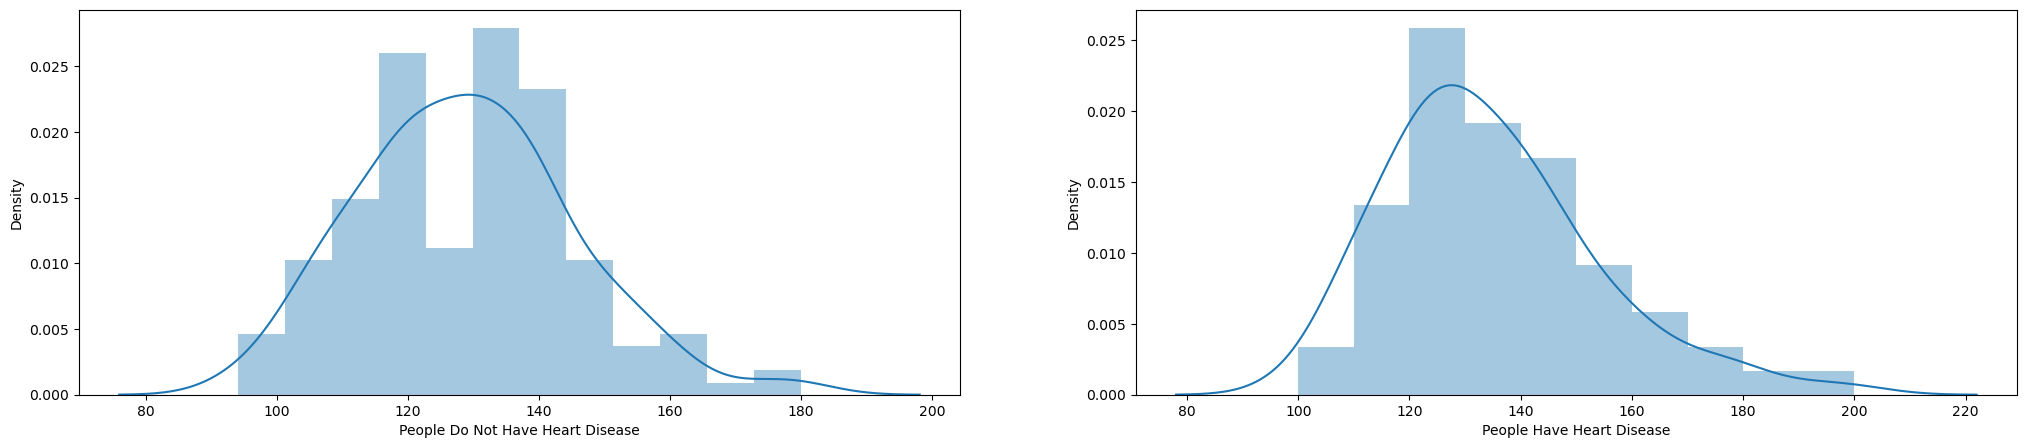

In [68]:
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(df[df['Heart Disease'] == 0]['BP'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(df[df['Heart Disease'] == 1]['BP'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [69]:
print('Min blood pressure of people who do not have heart disease: ', min(df[df['Heart Disease'] == 0]['BP']))
print('Max blood pressure of people who do not have heart disease: ', max(df[df['Heart Disease'] == 0]['BP']))
print('Average blood pressure of people who do not have heart disease: ', df[df['Heart Disease'] == 0]['BP'].mean())

Min blood pressure of people who do not have heart disease:  94
Max blood pressure of people who do not have heart disease:  180
Average blood pressure of people who do not have heart disease:  128.86666666666667


In [70]:
print('Min blood pressure of people who do not have heart disease: ', min(df[df['Heart Disease'] == 1]['BP']))
print('Max blood pressure of people who do not have heart disease: ', max(df[df['Heart Disease'] == 1]['BP']))
print('Average blood pressure of people who do not have heart disease: ', df[df['Heart Disease'] == 1]['BP'].mean())

Min blood pressure of people who do not have heart disease:  100
Max blood pressure of people who do not have heart disease:  200
Average blood pressure of people who do not have heart disease:  134.44166666666666


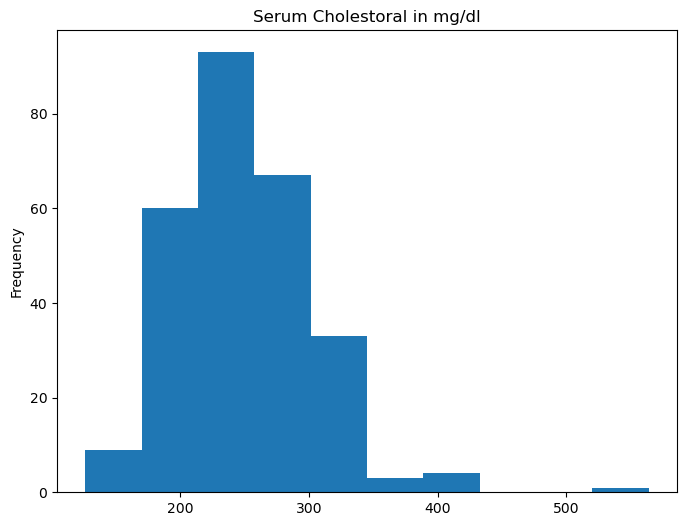

In [71]:
df['Cholesterol'].plot(kind = 'hist', title = 'Serum Cholestoral in mg/dl', figsize = (8, 6))
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



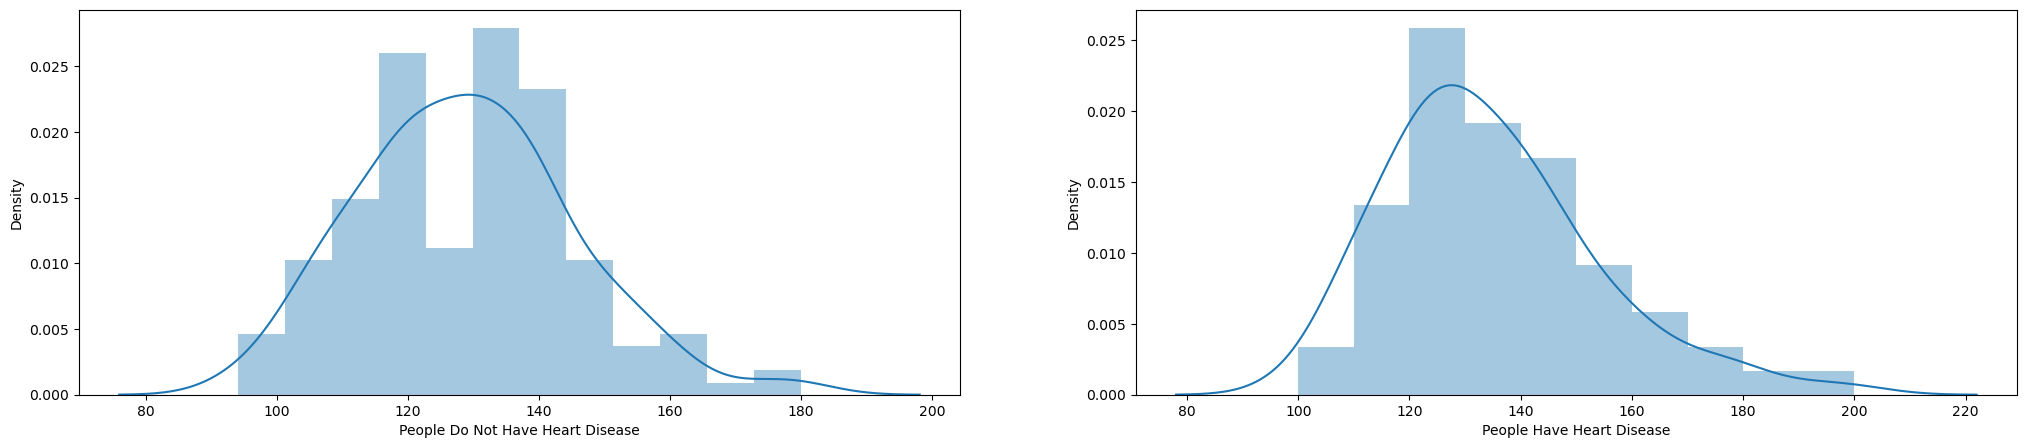

In [72]:
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(df[df['Heart Disease'] == 0]['BP'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(df[df['Heart Disease'] == 1]['BP'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [74]:
print('Min blood pressure of people who do not have heart disease: ', min(df[df['Heart Disease'] == 0]['BP']))
print('Max blood pressure of people who do not have heart disease: ', max(df[df['Heart Disease'] == 0]['BP']))
print('Average blood pressure of people who do not have heart disease: ', df[df['Heart Disease'] == 0]['BP'].mean())

Min blood pressure of people who do not have heart disease:  94
Max blood pressure of people who do not have heart disease:  180
Average blood pressure of people who do not have heart disease:  128.86666666666667


In [76]:
print('Min blood pressure of people who have heart disease: ', min(df[df['Heart Disease'] == 1]['BP']))
print('Max blood pressure of people who have heart disease: ', max(df[df['Heart Disease'] == 1]['BP']))
print('Average blood pressure of people who have heart disease: ', df[df['Heart Disease'] == 1]['BP'].mean())

Min blood pressure of people who have heart disease:  100
Max blood pressure of people who have heart disease:  200
Average blood pressure of people who have heart disease:  134.44166666666666
